<a href="https://colab.research.google.com/github/PhilipXue/Covid-19-analysis/blob/master/Tokyo_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import  pyplot as plt

In [0]:
from urllib import request

In [0]:
re = request.urlopen('https://stopcovid19.metro.tokyo.lg.jp/')

In [0]:
content = re.read()

In [0]:
bs = BeautifulSoup(content)

In [0]:
data = {'陽性患者数 (日別)':[],
'検査実施人数 (日別)':[]}

In [0]:
for table in bs.find_all('table'):
    for th in table.thead.tr:
        if th['aria-label'] in data:
            date = []
            stat = []
            for tr in table.tbody:
                date.append(tr.th.get_text())
                stat.append(int(tr.td.get_text()))
            data[th['aria-label']] = [date,stat]

In [0]:
pos_data = data['陽性患者数 (日別)']
test_data = data['検査実施人数 (日別)']

In [0]:
date_convert = np.vectorize(lambda x: '2020/{}'.format(x))

In [0]:
def process(data):
    date, stats = data
    date = date_convert(date)
    t = matplotlib.dates.date2num(pd.to_datetime(date))
    return t, np.array(stats,dtype=np.int)

In [0]:
def plot(test, t1, pos, t2):
    start_idx = len(t2) - len(t1) - 1
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.bar(t1, test)
    ax.bar(t1, pos[start_idx:-1], color='r')
    ax.xaxis_date()
    ax2 = ax.twinx()
    postive_ratio = pos[start_idx:-1] * 100 / (test+0.0001)
    postive_ratio = np.clip(postive_ratio,0, 100)
    ax2.plot_date(t1, postive_ratio,fmt='o-',color='black')
    

In [0]:
t1, test = process(test_data)
t2, pos = process(pos_data)

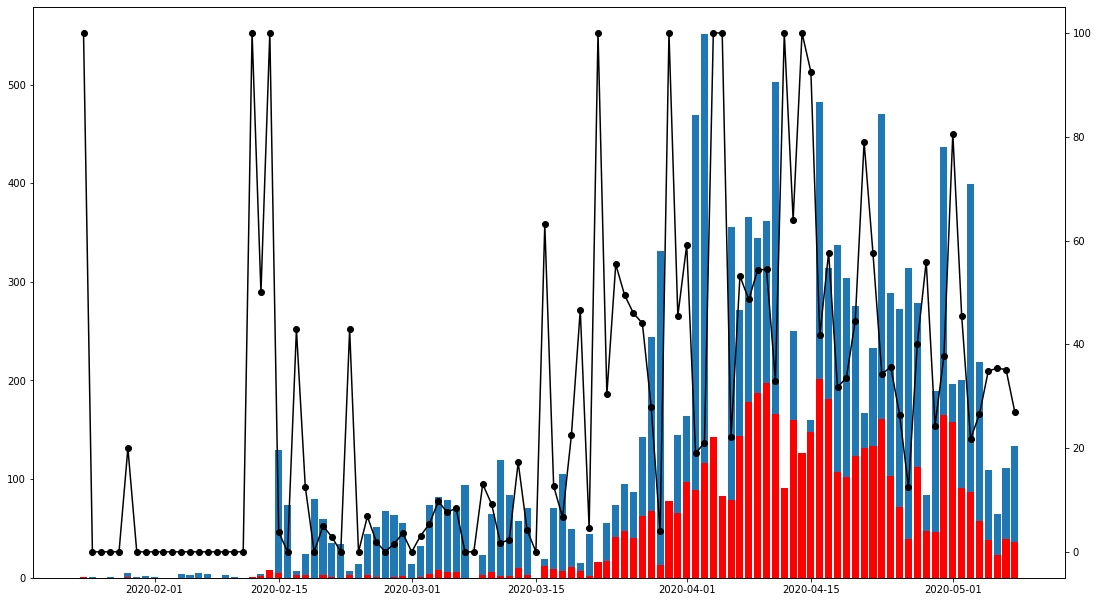

In [0]:
plot(test,t1,pos,t2)

In [0]:
# 7 days moving average to remove 
moving_average = lambda x: np.convolve(x, np.ones((7,))/7, mode='valid')

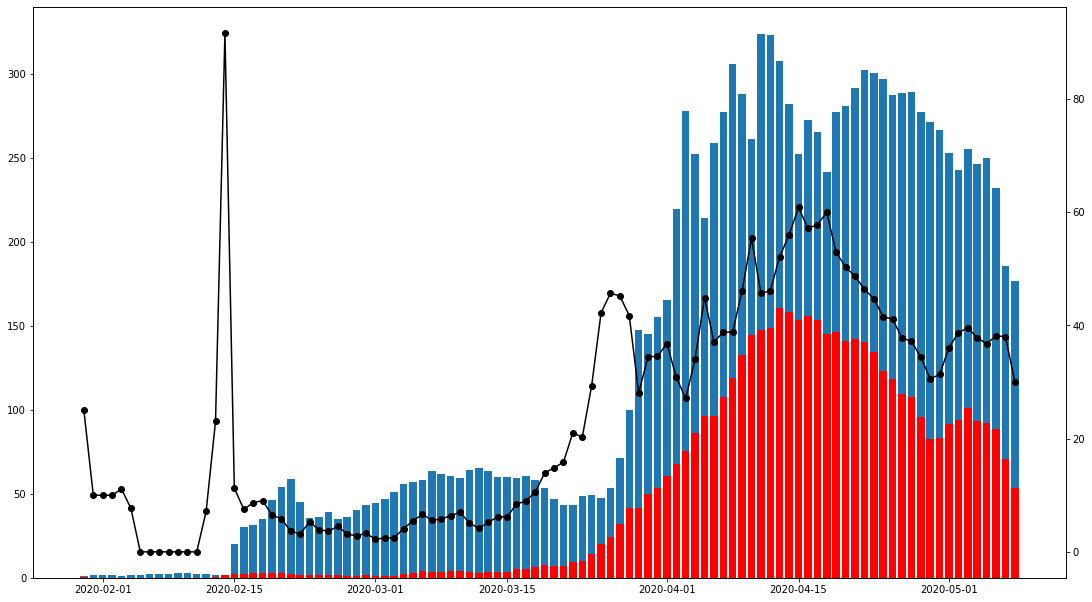

In [0]:
plot(moving_average(test), t1[:-6], moving_average(pos), t2[:-6])